In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, classification_report
)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier  # Corrected import
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


In [2]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)


Detected encoding: Windows-1252


Logistic Regression (Test Set):
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452

Logistic Regression (Train Set):
Training Accuracy: 0.9286, Precision: 0.9354, Recall: 0.9192, F1 Score: 0.9272, AUC: 0.9768, Error Rate: 0.0714, AUC-PR: 0.9695



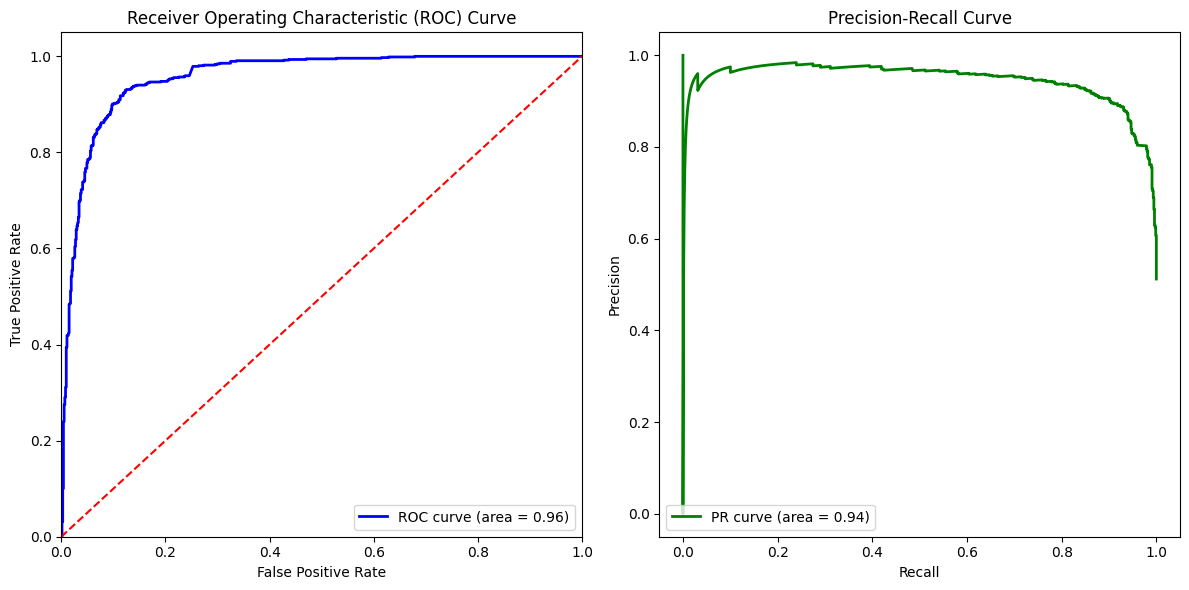

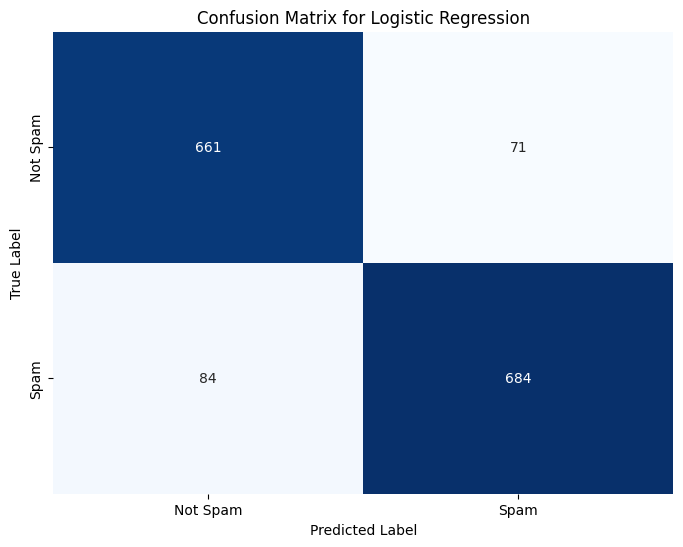

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

# Logistic Regression Model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_lr = logistic_regression_model.predict(v_train.toarray())
y_test_pred_lr = logistic_regression_model.predict(v_test.toarray())
y_test_prob_lr = logistic_regression_model.predict_proba(v_test.toarray())[:, 1]

# Evaluation Metrics (Test Set)
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
precision_lr = precision_score(y_test, y_test_pred_lr)
recall_lr = recall_score(y_test, y_test_pred_lr)
f1_lr = f1_score(y_test, y_test_pred_lr)
auc_lr = roc_auc_score(y_test, y_test_prob_lr)
error_rate_lr = 1 - accuracy_lr
auc_pr_lr = average_precision_score(y_test, y_test_prob_lr)

# Training Measurements
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
precision_train_lr = precision_score(y_train, y_train_pred_lr)
recall_train_lr = recall_score(y_train, y_train_pred_lr)
f1_train_lr = f1_score(y_train, y_train_pred_lr)
auc_train_lr = roc_auc_score(y_train, logistic_regression_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_lr = 1 - accuracy_train_lr
auc_pr_train_lr = average_precision_score(y_train, logistic_regression_model.predict_proba(v_train.toarray())[:, 1])

# Print Results
print(f"Logistic Regression (Test Set):")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, "
      f"F1 Score: {f1_lr:.4f}, AUC: {auc_lr:.4f}, Error Rate: {error_rate_lr:.4f}, AUC-PR: {auc_pr_lr:.4f}\n")
print(f"Logistic Regression (Train Set):")
print(f"Training Accuracy: {accuracy_train_lr:.4f}, Precision: {precision_train_lr:.4f}, "
      f"Recall: {recall_train_lr:.4f}, F1 Score: {f1_train_lr:.4f}, AUC: {auc_train_lr:.4f}, "
      f"Error Rate: {error_rate_train_lr:.4f}, AUC-PR: {auc_pr_train_lr:.4f}\n")

# Plot AUC-ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(12, 6))

# AUC-ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot AUC-PR Curve
precision_lr_curve, recall_lr_curve, _ = precision_recall_curve(y_test, y_test_prob_lr)
pr_auc_lr = auc(recall_lr_curve, precision_lr_curve)

# AUC-PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall_lr_curve, precision_lr_curve, color='green', lw=2, label=f'PR curve (area = {pr_auc_lr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Detected encoding: Windows-1252
Model: Naive Bayes (Test Set)
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414

Model: Naive Bayes (Train Set)
Training Accuracy: 0.9511, Precision: 1.0000, Recall: 0.9013, F1 Score: 0.9481, AUC: 0.9509, Error Rate: 0.0489, AUC-PR: 0.9504



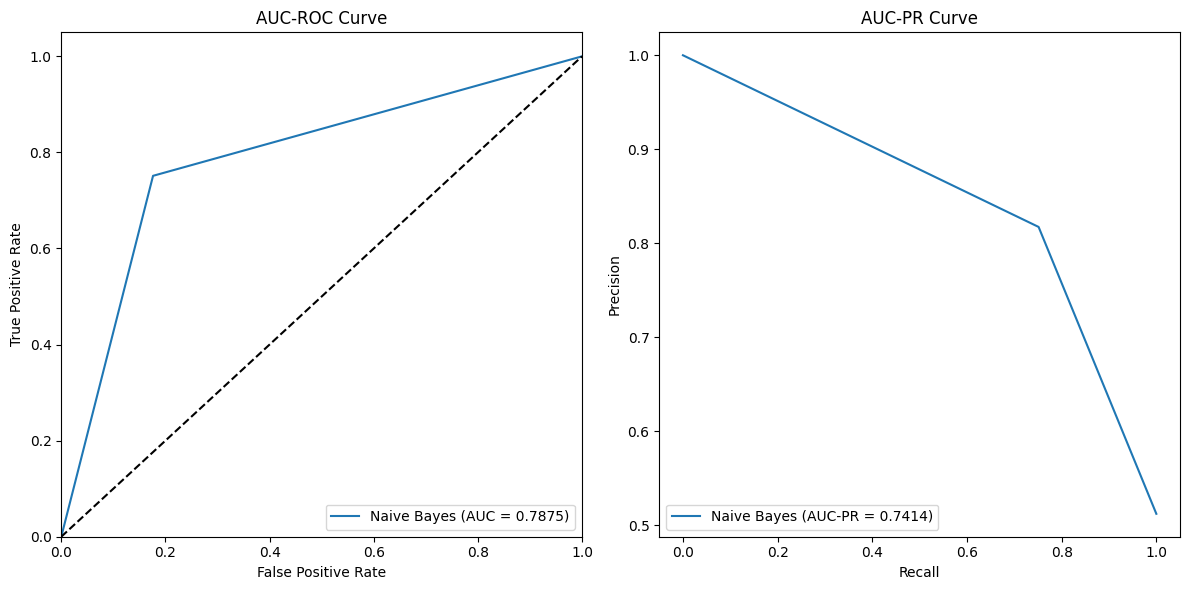

In [4]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model
naive_bayes_model.fit(v_train.toarray(), y_train)

# Make predictions
y_train_pred = naive_bayes_model.predict(v_train.toarray())
y_test_pred = naive_bayes_model.predict(v_test.toarray())

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, naive_bayes_model.predict_proba(v_test.toarray())[:, 1])
error_rate_test = 1 - accuracy_test
auc_pr_test = average_precision_score(y_test, naive_bayes_model.predict_proba(v_test.toarray())[:, 1])

# Calculate metrics for train set
y_train_pred_probs = naive_bayes_model.predict_proba(v_train.toarray())[:, 1]
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred_probs)
error_rate_train = 1 - accuracy_train
auc_pr_train = average_precision_score(y_train, y_train_pred_probs)

# Print results for Naive Bayes model
print("Model: Naive Bayes (Test Set)")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, "
      f"F1 Score: {f1_test:.4f}, AUC: {auc_test:.4f}, Error Rate: {error_rate_test:.4f}, AUC-PR: {auc_pr_test:.4f}\n")

print("Model: Naive Bayes (Train Set)")
print(f"Training Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, "
      f"Recall: {recall_train:.4f}, F1 Score: {f1_train:.4f}, AUC: {auc_train:.4f}, "
      f"Error Rate: {error_rate_train:.4f}, AUC-PR: {auc_pr_train:.4f}\n")

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, naive_bayes_model.predict_proba(v_test.toarray())[:, 1])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.4f})'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')

# AUC-PR Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, naive_bayes_model.predict_proba(v_test.toarray())[:, 1])
plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, label='Naive Bayes (AUC-PR = {:.4f})'.format(auc_pr_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUC-PR Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


KNN (Test Set):
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452

KNN (Train Set):
Training Accuracy: 0.5703, Precision: 0.5356, Recall: 0.9913, F1 Score: 0.6954, AUC: 0.9189, Error Rate: 0.4297, AUC-PR: 0.8790



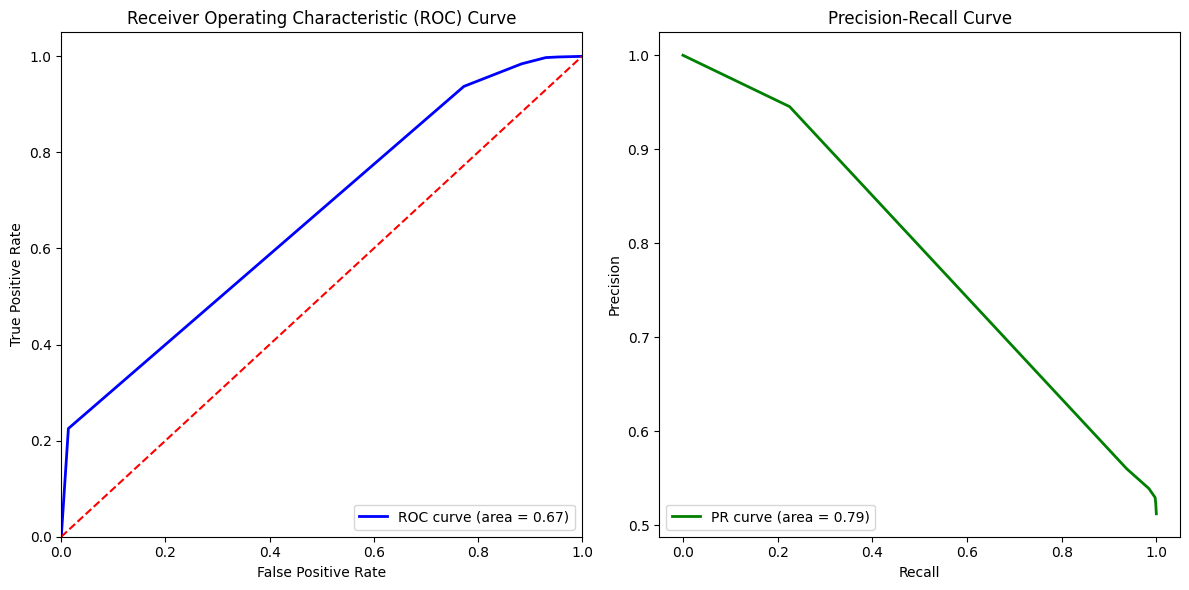

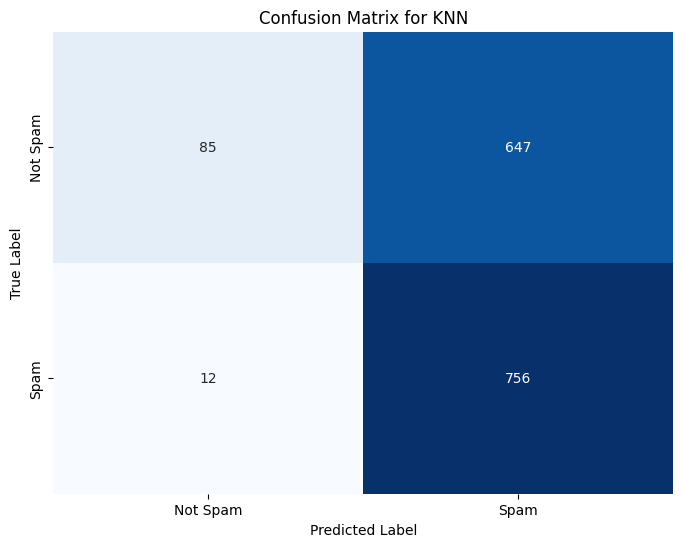

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_knn = knn_model.predict(v_train.toarray())
y_test_pred_knn = knn_model.predict(v_test.toarray())
y_test_prob_knn = knn_model.predict_proba(v_test.toarray())[:, 1]

# Evaluation Metrics (Test Set)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_knn = precision_score(y_test, y_test_pred_knn)
recall_knn = recall_score(y_test, y_test_pred_knn)
f1_knn = f1_score(y_test, y_test_pred_knn)
auc_knn = roc_auc_score(y_test, y_test_prob_knn)
error_rate_knn = 1 - accuracy_knn
auc_pr_knn = average_precision_score(y_test, y_test_prob_knn)

# Training Measurements
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
precision_train_knn = precision_score(y_train, y_train_pred_knn)
recall_train_knn = recall_score(y_train, y_train_pred_knn)
f1_train_knn = f1_score(y_train, y_train_pred_knn)
auc_train_knn = roc_auc_score(y_train, knn_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_knn = 1 - accuracy_train_knn
auc_pr_train_knn = average_precision_score(y_train, knn_model.predict_proba(v_train.toarray())[:, 1])

# Print Results
print(f"KNN (Test Set):")
print(f"Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, "
      f"F1 Score: {f1_knn:.4f}, AUC: {auc_knn:.4f}, Error Rate: {error_rate_knn:.4f}, AUC-PR: {auc_pr_knn:.4f}\n")
print(f"KNN (Train Set):")
print(f"Training Accuracy: {accuracy_train_knn:.4f}, Precision: {precision_train_knn:.4f}, "
      f"Recall: {recall_train_knn:.4f}, F1 Score: {f1_train_knn:.4f}, AUC: {auc_train_knn:.4f}, "
      f"Error Rate: {error_rate_train_knn:.4f}, AUC-PR: {auc_pr_train_knn:.4f}\n")

# Plot AUC-ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(12, 6))

# AUC-ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot AUC-PR Curve
precision_knn_curve, recall_knn_curve, _ = precision_recall_curve(y_test, y_test_prob_knn)
pr_auc_knn = auc(recall_knn_curve, precision_knn_curve)

# AUC-PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall_knn_curve, precision_knn_curve, color='green', lw=2, label=f'PR curve (area = {pr_auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()


SVM (Test Set):
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9602, Error Rate: 0.0840, AUC-PR: 0.9432

SVM (Train Set):
Training Accuracy: 0.9786, Precision: 0.9616, Recall: 0.9965, F1 Score: 0.9787, AUC: 0.9954, Error Rate: 0.0214, AUC-PR: 0.9925



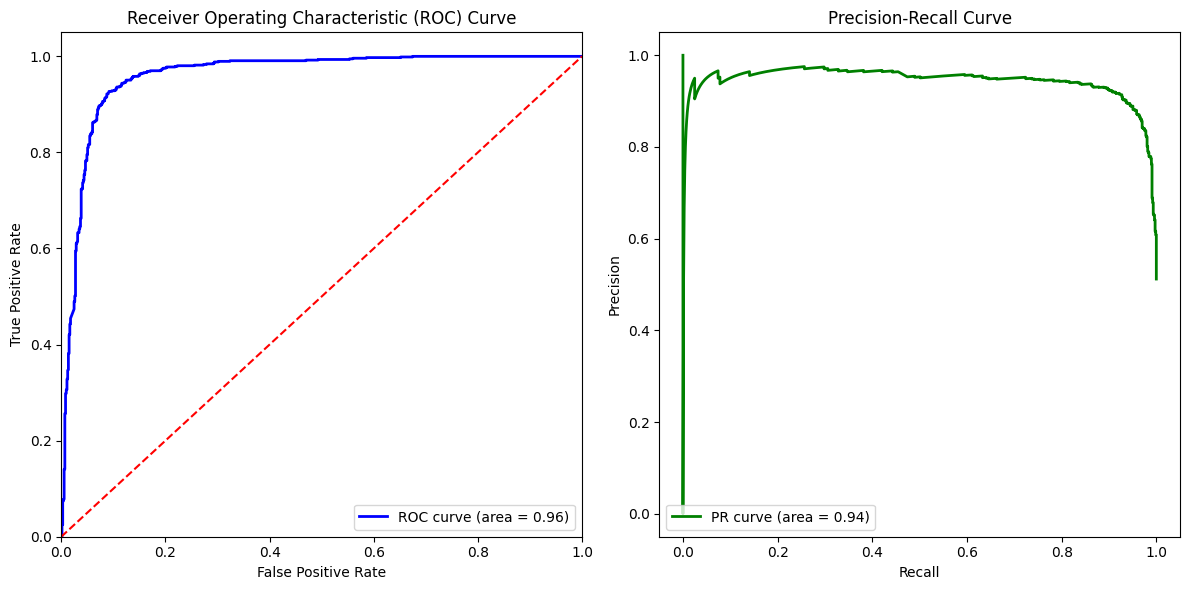

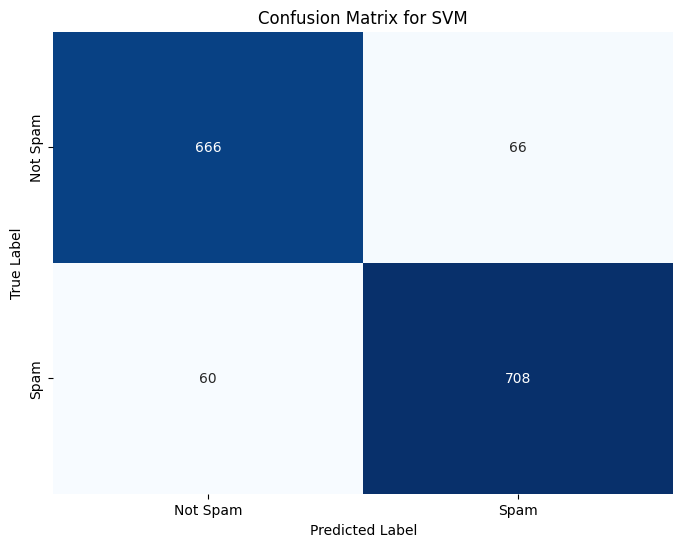

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(probability=True)  # Enable probability estimates for AUC
svm_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_svm = svm_model.predict(v_train.toarray())
y_test_pred_svm = svm_model.predict(v_test.toarray())
y_test_prob_svm = svm_model.predict_proba(v_test.toarray())[:, 1]

# Evaluation Metrics (Test Set)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm)
auc_svm = roc_auc_score(y_test, y_test_prob_svm)
error_rate_svm = 1 - accuracy_svm
auc_pr_svm = average_precision_score(y_test, y_test_prob_svm)

# Training Measurements
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_svm = precision_score(y_train, y_train_pred_svm)
recall_train_svm = recall_score(y_train, y_train_pred_svm)
f1_train_svm = f1_score(y_train, y_train_pred_svm)
auc_train_svm = roc_auc_score(y_train, svm_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_svm = 1 - accuracy_train_svm
auc_pr_train_svm = average_precision_score(y_train, svm_model.predict_proba(v_train.toarray())[:, 1])

# Print Results
print(f"SVM (Test Set):")
print(f"Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, "
      f"F1 Score: {f1_svm:.4f}, AUC: {auc_svm:.4f}, Error Rate: {error_rate_svm:.4f}, AUC-PR: {auc_pr_svm:.4f}\n")
print(f"SVM (Train Set):")
print(f"Training Accuracy: {accuracy_train_svm:.4f}, Precision: {precision_train_svm:.4f}, "
      f"Recall: {recall_train_svm:.4f}, F1 Score: {f1_train_svm:.4f}, AUC: {auc_train_svm:.4f}, "
      f"Error Rate: {error_rate_train_svm:.4f}, AUC-PR: {auc_pr_train_svm:.4f}\n")

# Plot AUC-ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_test_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(12, 6))

# AUC-ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot AUC-PR Curve
precision_svm_curve, recall_svm_curve, _ = precision_recall_curve(y_test, y_test_prob_svm)
pr_auc_svm = auc(recall_svm_curve, precision_svm_curve)

# AUC-PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall_svm_curve, precision_svm_curve, color='green', lw=2, label=f'PR curve (area = {pr_auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


Multi-layer Perceptron (Test Set):
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872, AUC: 0.9424, Error Rate: 0.1173, AUC-PR: 0.9375

Multi-layer Perceptron (Train Set):
Training Accuracy: 0.9946, Precision: 0.9920, Recall: 0.9971, F1 Score: 0.9945, AUC: 0.9999, Error Rate: 0.0054, AUC-PR: 0.9999



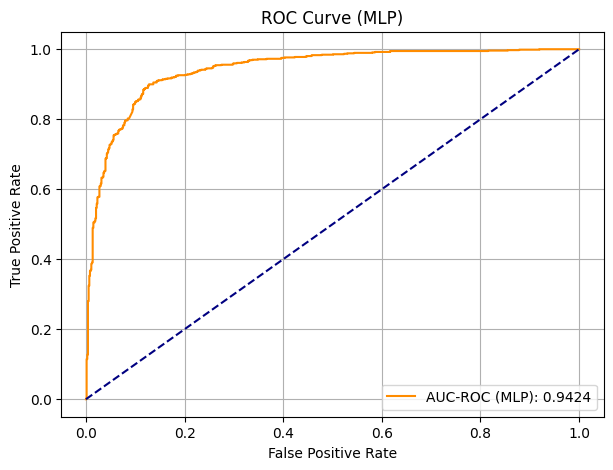

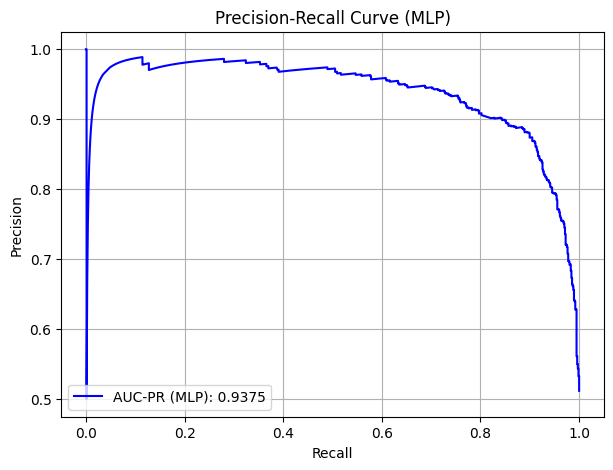

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Multi-layer Perceptron Model with random_state for reproducibility
mlp_model = MLPClassifier(max_iter=300, random_state=42)
mlp_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_mlp = mlp_model.predict(v_train.toarray())
y_test_pred_mlp = mlp_model.predict(v_test.toarray())
y_test_prob_mlp = mlp_model.predict_proba(v_test.toarray())[:, 1]

# Evaluation Metrics (Test Set)
accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
precision_mlp = precision_score(y_test, y_test_pred_mlp)
recall_mlp = recall_score(y_test, y_test_pred_mlp)
f1_mlp = f1_score(y_test, y_test_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_test_prob_mlp)
error_rate_mlp = 1 - accuracy_mlp
auc_pr_mlp = average_precision_score(y_test, y_test_prob_mlp)

# Training Measurements
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
precision_train_mlp = precision_score(y_train, y_train_pred_mlp)
recall_train_mlp = recall_score(y_train, y_train_pred_mlp)
f1_train_mlp = f1_score(y_train, y_train_pred_mlp)
auc_train_mlp = roc_auc_score(y_train, mlp_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_mlp = 1 - accuracy_train_mlp
auc_pr_train_mlp = average_precision_score(y_train, mlp_model.predict_proba(v_train.toarray())[:, 1])

# Print Results
print(f"Multi-layer Perceptron (Test Set):")
print(f"Accuracy: {accuracy_mlp:.4f}, Precision: {precision_mlp:.4f}, Recall: {recall_mlp:.4f}, "
      f"F1 Score: {f1_mlp:.4f}, AUC: {auc_mlp:.4f}, Error Rate: {error_rate_mlp:.4f}, AUC-PR: {auc_pr_mlp:.4f}\n")
print(f"Multi-layer Perceptron (Train Set):")
print(f"Training Accuracy: {accuracy_train_mlp:.4f}, Precision: {precision_train_mlp:.4f}, "
      f"Recall: {recall_train_mlp:.4f}, F1 Score: {f1_train_mlp:.4f}, AUC: {auc_train_mlp:.4f}, "
      f"Error Rate: {error_rate_train_mlp:.4f}, AUC-PR: {auc_pr_train_mlp:.4f}\n")

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob_mlp)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC-ROC (MLP): {auc_mlp:.4f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MLP)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# AUC-PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob_mlp)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"AUC-PR (MLP): {auc_pr_mlp:.4f}", color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (MLP)')
plt.legend(loc="lower left")
plt.grid()
plt.show()


Random Forest (Test Set):
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277

Random Forest (Train Set):
Training Accuracy: 0.9949, Precision: 0.9920, Recall: 0.9977, F1 Score: 0.9948, AUC: 0.9992, Error Rate: 0.0051, AUC-PR: 0.9990



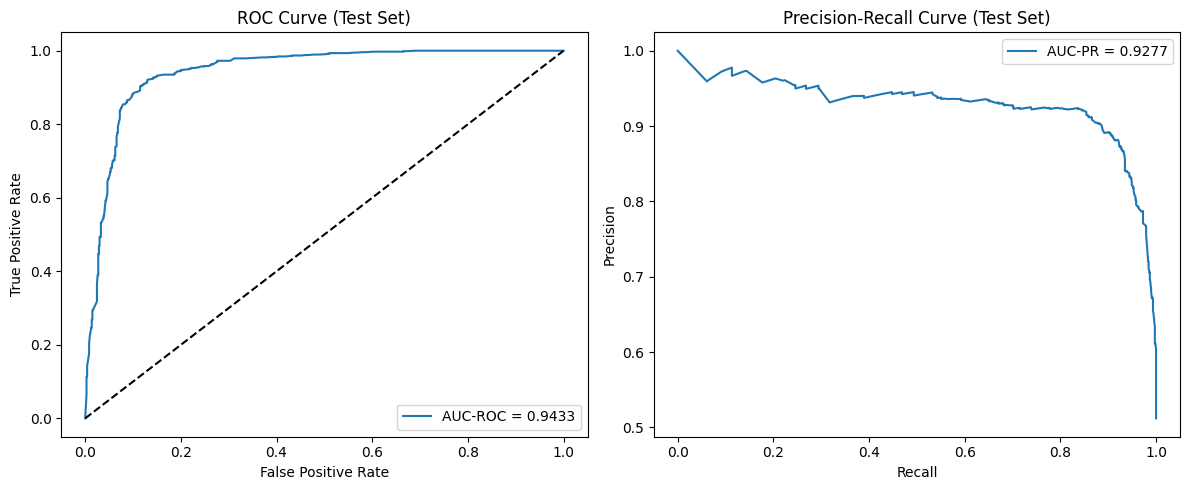

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest Model with fixed random_state
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_rf = rf_model.predict(v_train.toarray())
y_test_pred_rf = rf_model.predict(v_test.toarray())

# Evaluation Metrics (Test Set)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(v_test.toarray())[:, 1])
error_rate_rf = 1 - accuracy_rf
auc_pr_rf = average_precision_score(y_test, rf_model.predict_proba(v_test.toarray())[:, 1])

# Training Measurements
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf)
auc_train_rf = roc_auc_score(y_train, rf_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_rf = 1 - accuracy_train_rf
auc_pr_train_rf = average_precision_score(y_train, rf_model.predict_proba(v_train.toarray())[:, 1])

# Print Results
print(f"Random Forest (Test Set):")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, "
      f"F1 Score: {f1_rf:.4f}, AUC: {auc_rf:.4f}, Error Rate: {error_rate_rf:.4f}, AUC-PR: {auc_pr_rf:.4f}\n")
print(f"Random Forest (Train Set):")
print(f"Training Accuracy: {accuracy_train_rf:.4f}, Precision: {precision_train_rf:.4f}, "
      f"Recall: {recall_train_rf:.4f}, F1 Score: {f1_train_rf:.4f}, AUC: {auc_train_rf:.4f}, "
      f"Error Rate: {error_rate_train_rf:.4f}, AUC-PR: {auc_pr_train_rf:.4f}\n")

# ROC and PR Curves (Test Set)
y_test_prob_rf = rf_model.predict_proba(v_test.toarray())[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob_rf)
precision, recall, _ = precision_recall_curve(y_test, y_test_prob_rf)

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_rf:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Set)')
plt.legend()

plt.tight_layout()
plt.show()


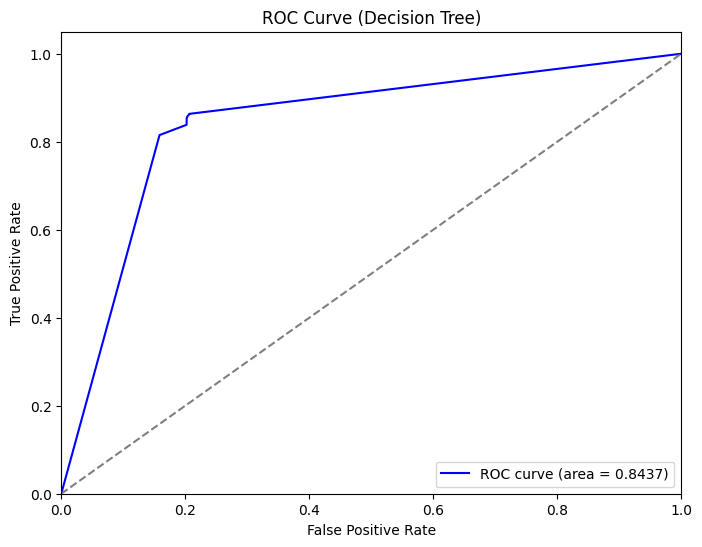

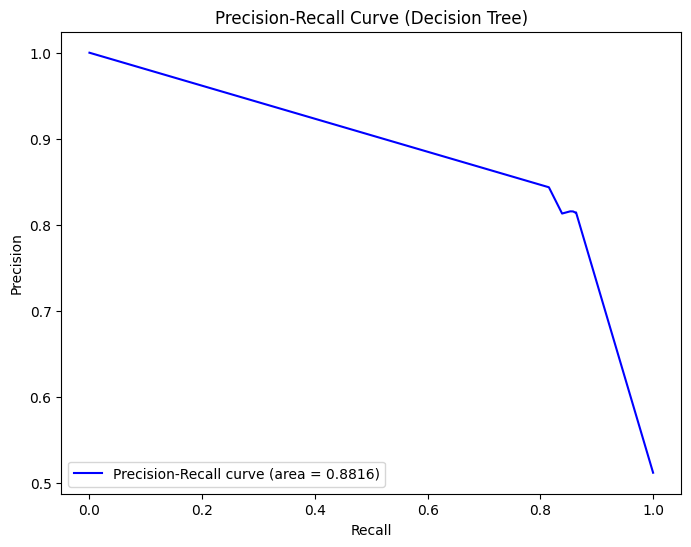

Decision Tree (Test Set):
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969

Decision Tree (Train Set):
Training Accuracy: 0.9949, Precision: 0.9942, Recall: 0.9954, F1 Score: 0.9948, AUC: 0.9999, Error Rate: 0.0051, AUC-PR: 0.9999



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc)

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)  # Added random state for reproducibility
decision_tree_model.fit(v_train.toarray(), y_train)

# Predictions
y_train_pred_dt = decision_tree_model.predict(v_train.toarray())
y_test_pred_dt = decision_tree_model.predict(v_test.toarray())

# Evaluation Metrics (Test Set)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(v_test.toarray())[:, 1])
error_rate_dt = 1 - accuracy_dt
auc_pr_dt = average_precision_score(y_test, decision_tree_model.predict_proba(v_test.toarray())[:, 1])

# Training Measurements
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
precision_train_dt = precision_score(y_train, y_train_pred_dt)
recall_train_dt = recall_score(y_train, y_train_pred_dt)
f1_train_dt = f1_score(y_train, y_train_pred_dt)
auc_train_dt = roc_auc_score(y_train, decision_tree_model.predict_proba(v_train.toarray())[:, 1])
error_rate_train_dt = 1 - accuracy_train_dt
auc_pr_train_dt = average_precision_score(y_train, decision_tree_model.predict_proba(v_train.toarray())[:, 1])

# Plotting AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, decision_tree_model.predict_proba(v_test.toarray())[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Plotting AUC-PR Curve
precision, recall, _ = precision_recall_curve(y_test, decision_tree_model.predict_proba(v_test.toarray())[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (area = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.legend(loc="lower left")
plt.show()

# Print Results
print(f"Decision Tree (Test Set):")
print(f"Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, "
      f"F1 Score: {f1_dt:.4f}, AUC: {auc_dt:.4f}, Error Rate: {error_rate_dt:.4f}, AUC-PR: {auc_pr_dt:.4f}\n")
print(f"Decision Tree (Train Set):")
print(f"Training Accuracy: {accuracy_train_dt:.4f}, Precision: {precision_train_dt:.4f}, "
      f"Recall: {recall_train_dt:.4f}, F1 Score: {f1_train_dt:.4f}, AUC: {auc_train_dt:.4f}, "
      f"Error Rate: {error_rate_train_dt:.4f}, AUC-PR: {auc_pr_train_dt:.4f}\n")


In [11]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")


Detected encoding: Windows-1252
Model: Logistic Regression
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452

Model: Naive Bayes
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414

Model: Random Forest
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277

Model: Support Vector Classifier
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9603, Error Rate: 0.0840, AUC-PR: 0.9432

Model: Decision Tree
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969

Model: K-Nearest Neighbors
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452

Model: Multi-layer Perceptron
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872,

In [12]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results in dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Calculate the best overall model by summing rankings across multiple metrics
ranked_df = results_df.rank(ascending=False)
ranked_df["Error Rate"] = results_df["Error Rate"].rank(ascending=True)  # For error rate, lower is better
results_df["Total Rank"] = ranked_df.sum(axis=1)

# Determine the overall best model (lowest total rank)
best_model = results_df["Total Rank"].idxmin()

# Define a function to highlight maximum, minimum, and best overall values
def highlight_best(data):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)
    
    # Highlight the maximum values for accuracy, precision, recall, F1 score, AUC, AUC-PR
    for col in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "AUC-PR"]:
        max_idx = data[col].idxmax()
        highlight.loc[max_idx, col] = 'background-color: lightgreen'
    
    # Highlight the minimum value for error rate
    min_idx = data["Error Rate"].idxmin()
    highlight.loc[min_idx, "Error Rate"] = 'background-color: lightgreen'
    
    # Highlight the overall best model (based on total rank)
    highlight.loc[best_model, :] = 'background-color: yellow'
    
    return highlight

# Apply the function to highlight the best values and the overall best model
styled_df = results_df.style.apply(highlight_best, axis=None)

# Display the styled DataFrame
styled_df


Detected encoding: Windows-1252


,Accuracy,Precision,Recall,F1 Score,AUC,Error Rate,AUC-PR,Total Rank
Logistic Regression,0.896667,0.905960,0.890625,0.898227,0.957130,0.103333,0.945165,15.000000
Naive Bayes,0.786667,0.817280,0.751302,0.782904,0.787536,0.213333,0.741358,42.000000
Random Forest,0.889333,0.895013,0.888021,0.891503,0.943327,0.110667,0.927684,24.000000
Support Vector Classifier,0.916000,0.914729,0.921875,0.918288,0.960251,0.084000,0.943237,9.000000
Decision Tree,0.828000,0.815594,0.858073,0.836294,0.843706,0.172000,0.796897,37.000000
K-Nearest Neighbors,0.560667,0.538845,0.984375,0.696453,0.665088,0.439333,0.645216,43.000000
Multi-layer Perceptron,0.882667,0.873737,0.901042,0.887179,0.942380,0.117333,0.937463,26.000000


In [13]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results in dictionary
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Calculate the best overall model by summing rankings across multiple metrics
ranked_df = results_df.rank(ascending=False)
ranked_df["Error Rate"] = results_df["Error Rate"].rank(ascending=True)  # For error rate, lower is better
results_df["Total Rank"] = ranked_df.sum(axis=1)

# Determine the overall best model (lowest total rank)
best_model = results_df["Total Rank"].idxmin()

# Define a function to highlight maximum, minimum, and best overall values
def highlight_best(data):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)
    
    # Highlight the maximum values for accuracy, precision, recall, F1 score, AUC, AUC-PR
    for col in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "AUC-PR"]:
        max_idx = data[col].idxmax()
        highlight.loc[max_idx, col] = 'background-color: lightgreen'
    
    # Highlight the minimum value for error rate
    min_idx = data["Error Rate"].idxmin()
    highlight.loc[min_idx, "Error Rate"] = 'background-color: lightgreen'
    
    return highlight

# Define a function to highlight the best model name
def highlight_best_model_name(data):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)
    highlight.loc[best_model, "Model"] = 'background-color: yellow'
    return highlight

# Add a "Model" column for model names
results_df['Model'] = results_df.index

# Apply the function to highlight the best values and the overall best model name
styled_df = results_df.style.apply(highlight_best, axis=None).apply(highlight_best_model_name, subset=["Model"], axis=None)

# Display the styled DataFrame
styled_df


Detected encoding: Windows-1252


,Accuracy,Precision,Recall,F1 Score,AUC,Error Rate,AUC-PR,Total Rank,Model
Logistic Regression,0.896667,0.905960,0.890625,0.898227,0.957130,0.103333,0.945165,15.000000,Logistic Regression
Naive Bayes,0.786667,0.817280,0.751302,0.782904,0.787536,0.213333,0.741358,42.000000,Naive Bayes
Random Forest,0.889333,0.895013,0.888021,0.891503,0.943327,0.110667,0.927684,24.000000,Random Forest
Support Vector Classifier,0.916000,0.914729,0.921875,0.918288,0.960254,0.084000,0.943240,9.000000,Support Vector Classifier
Decision Tree,0.828000,0.815594,0.858073,0.836294,0.843706,0.172000,0.796897,37.000000,Decision Tree
K-Nearest Neighbors,0.560667,0.538845,0.984375,0.696453,0.665088,0.439333,0.645216,43.000000,K-Nearest Neighbors
Multi-layer Perceptron,0.882667,0.873737,0.901042,0.887179,0.942380,0.117333,0.937463,26.000000,Multi-layer Perceptron


In [1]:
print("hello")

hello


In [2]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Print results for the Voting Classifier
print(f"Model: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")


Detected encoding: Windows-1252
Model: Voting Classifier
Accuracy: 0.9047, Precision: 0.8872, Recall: 0.9323, F1 Score: 0.9092, AUC: 0.9604, Error Rate: 0.0953, AUC-PR: 0.9470



Detected encoding: Windows-1252
Model: Voting Classifier
Training Accuracy: 0.9931, Training Precision: 0.9880, Training Recall: 0.9983, Training F1 Score: 0.9931, Training AUC: 0.9998, Training Error Rate: 0.0069, Training AUC-PR: 0.9998

Testing Accuracy: 0.9047, Testing Precision: 0.8872, Testing Recall: 0.9323, Testing F1 Score: 0.9092, Testing AUC: 0.9604, Testing Error Rate: 0.0953, Testing AUC-PR: 0.9470



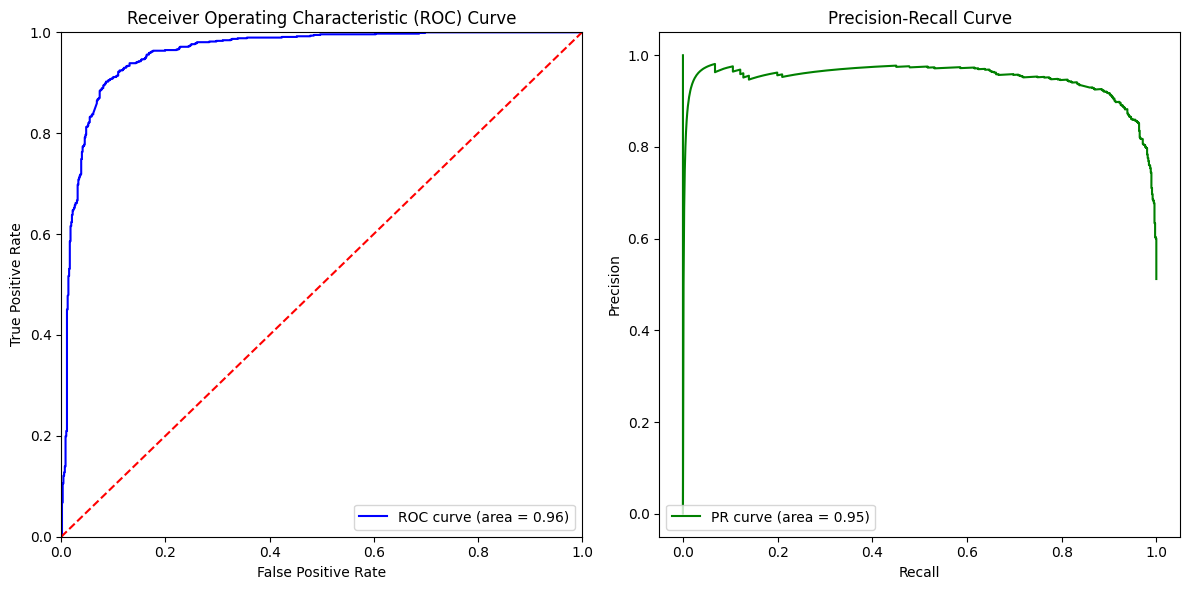

In [3]:
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, roc_curve, precision_recall_curve
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)

# Make predictions
y_train_pred = voting_clf.predict(v_train.toarray())
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_train = roc_auc_score(y_train, voting_clf.predict_proba(v_train.toarray())[:, 1])
auc_test = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate_train = 1 - accuracy_train
error_rate_test = 1 - accuracy_test
auc_pr_train = average_precision_score(y_train, voting_clf.predict_proba(v_train.toarray())[:, 1])
auc_pr_test = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Print results for the Voting Classifier
print(f"Model: Voting Classifier")
print(f"Training Accuracy: {accuracy_train:.4f}, Training Precision: {precision_train:.4f}, "
      f"Training Recall: {recall_train:.4f}, Training F1 Score: {f1_train:.4f}, "
      f"Training AUC: {auc_train:.4f}, Training Error Rate: {error_rate_train:.4f}, "
      f"Training AUC-PR: {auc_pr_train:.4f}\n")

print(f"Testing Accuracy: {accuracy_test:.4f}, Testing Precision: {precision_test:.4f}, "
      f"Testing Recall: {recall_test:.4f}, Testing F1 Score: {f1_test:.4f}, "
      f"Testing AUC: {auc_test:.4f}, Testing Error Rate: {error_rate_test:.4f}, "
      f"Testing AUC-PR: {auc_pr_test:.4f}\n")

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
roc_auc = auc_test

# Calculate Precision-Recall curve and AUC-PR
precision_curve, recall_curve, _ = precision_recall_curve(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
auc_pr_value = auc_pr_test

# Plot ROC curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, color='green', label=f'PR curve (area = {auc_pr_value:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


In [4]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Print results for the Voting Classifier
print(f"Model: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")



Detected encoding: Windows-1252
Model: Logistic Regression
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452

Model: Naive Bayes
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414

Model: Random Forest
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277

Model: Support Vector Classifier
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9602, Error Rate: 0.0840, AUC-PR: 0.9432

Model: Decision Tree
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969

Model: K-Nearest Neighbors
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452

Model: Multi-layer Perceptron
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872,

In [6]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Store results for Voting Classifier
results['Voting Classifier'] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
    "Error Rate": error_rate,
    "AUC-PR": auc_pr
}

# Create a DataFrame for the results
results_df = pd.DataFrame(results).T

# Find the best model
best_model = results_df['Accuracy'].idxmax()

# Define a function to highlight the maximum values and minimum error rate
def highlight_results(data, best_model):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)

    # Highlight model name in yellow for the best model
    highlight.loc[best_model, "Accuracy"] = 'background-color: yellow'
    
    # Highlight maximum values
    for col in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "AUC-PR"]:
        max_idx = data[col].idxmax()
        highlight.loc[max_idx, col] = 'background-color: lightgreen'

    # Highlight minimum error rate
    min_idx = data["Error Rate"].idxmin()
    highlight.loc[min_idx, "Error Rate"] = 'background-color: lightgreen'

    return highlight

# Apply highlights
styled_results = results_df.style.apply(lambda _: highlight_results(results_df, best_model), axis=None)

# Display the styled DataFrame
styled_results


Detected encoding: Windows-1252


,Accuracy,Precision,Recall,F1 Score,AUC,Error Rate,AUC-PR
Logistic Regression,0.896667,0.905960,0.890625,0.898227,0.957130,0.103333,0.945165
Naive Bayes,0.786667,0.817280,0.751302,0.782904,0.787536,0.213333,0.741358
Random Forest,0.889333,0.895013,0.888021,0.891503,0.943327,0.110667,0.927684
Support Vector Classifier,0.916000,0.914729,0.921875,0.918288,0.960251,0.084000,0.943237
Decision Tree,0.828000,0.815594,0.858073,0.836294,0.843706,0.172000,0.796897
K-Nearest Neighbors,0.560667,0.538845,0.984375,0.696453,0.665088,0.439333,0.645216
Multi-layer Perceptron,0.882667,0.873737,0.901042,0.887179,0.942380,0.117333,0.937463
Voting Classifier,0.904667,0.887237,0.932292,0.909206,0.960408,0.095333,0.946967


In [1]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Store results for Voting Classifier
results['Voting Classifier'] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
    "Error Rate": error_rate,
    "AUC-PR": auc_pr
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Calculate the best overall model by summing rankings across multiple metrics
ranked_df = results_df.rank(ascending=False)
ranked_df["Error Rate"] = results_df["Error Rate"].rank(ascending=True)  # For error rate, lower is better
results_df["Total Rank"] = ranked_df.sum(axis=1)

# Determine the overall best model (lowest total rank)
best_model = results_df["Total Rank"].idxmin()

# Define a function to highlight maximum, minimum, and best overall values
def highlight_best(data):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)
    
    # Highlight the maximum values for accuracy, precision, recall, F1 score, AUC, AUC-PR
    for col in ["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "AUC-PR"]:
        max_idx = data[col].idxmax()
        highlight.loc[max_idx, col] = 'background-color: lightgreen'
    
    # Highlight the minimum value for error rate
    min_idx = data["Error Rate"].idxmin()
    highlight.loc[min_idx, "Error Rate"] = 'background-color: lightgreen'
    
    return highlight

# Define a function to highlight the best model name
def highlight_best_model_name(data):
    highlight = pd.DataFrame('', index=data.index, columns=data.columns)
    highlight.loc[best_model, "Model"] = 'background-color: yellow'
    return highlight

# Add a "Model" column for model names
results_df['Model'] = results_df.index

# Apply the function to highlight the best values and the overall best model name
styled_df = results_df.style.apply(highlight_best, axis=None).apply(highlight_best_model_name, subset=["Model"], axis=None)

# Display the styled DataFrame
styled_df



Detected encoding: Windows-1252


,Accuracy,Precision,Recall,F1 Score,AUC,Error Rate,AUC-PR,Total Rank,Model
Logistic Regression,0.896667,0.905960,0.890625,0.898227,0.957130,0.103333,0.945165,21.000000,Logistic Regression
Naive Bayes,0.786667,0.817280,0.751302,0.782904,0.787536,0.213333,0.741358,49.000000,Naive Bayes
Random Forest,0.889333,0.895013,0.888021,0.891503,0.943327,0.110667,0.927684,30.000000,Random Forest
Support Vector Classifier,0.916000,0.914729,0.921875,0.918288,0.960246,0.084000,0.943234,12.000000,Support Vector Classifier
Decision Tree,0.828000,0.815594,0.858073,0.836294,0.843706,0.172000,0.796897,44.000000,Decision Tree
K-Nearest Neighbors,0.560667,0.538845,0.984375,0.696453,0.665088,0.439333,0.645216,49.000000,K-Nearest Neighbors
Multi-layer Perceptron,0.882667,0.873737,0.901042,0.887179,0.942380,0.117333,0.937463,33.000000,Multi-layer Perceptron
Voting Classifier,0.904667,0.887237,0.932292,0.909206,0.960412,0.095333,0.946969,14.000000,Voting Classifier


Detected encoding: Windows-1252
Model: Logistic Regression
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452

Model: Naive Bayes
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414

Model: Random Forest
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277

Model: Support Vector Classifier
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9602, Error Rate: 0.0840, AUC-PR: 0.9432

Model: Decision Tree
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969

Model: K-Nearest Neighbors
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452

Model: Multi-layer Perceptron
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872,

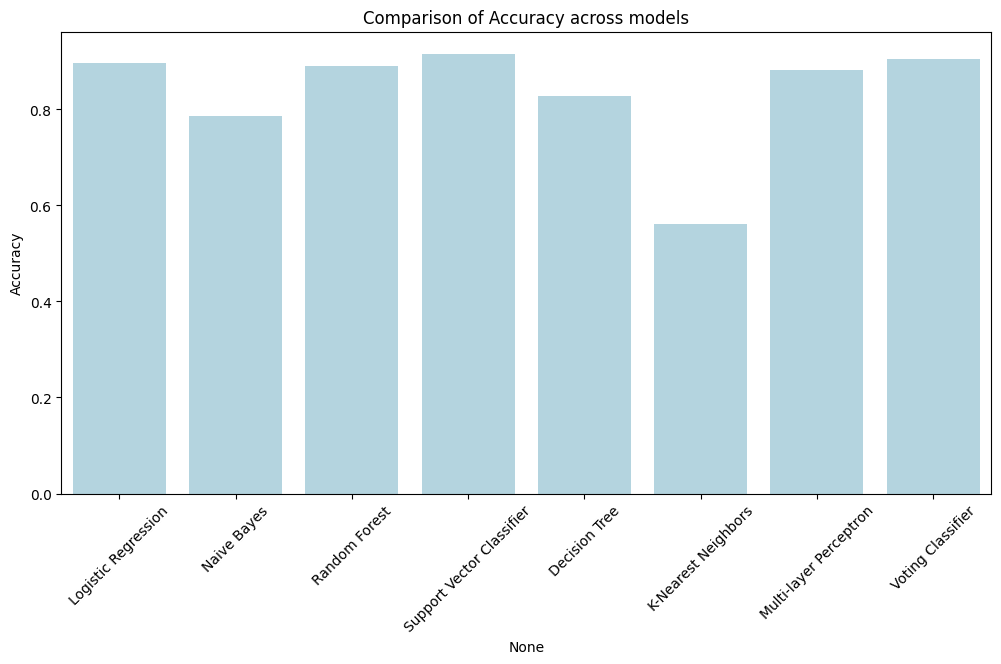

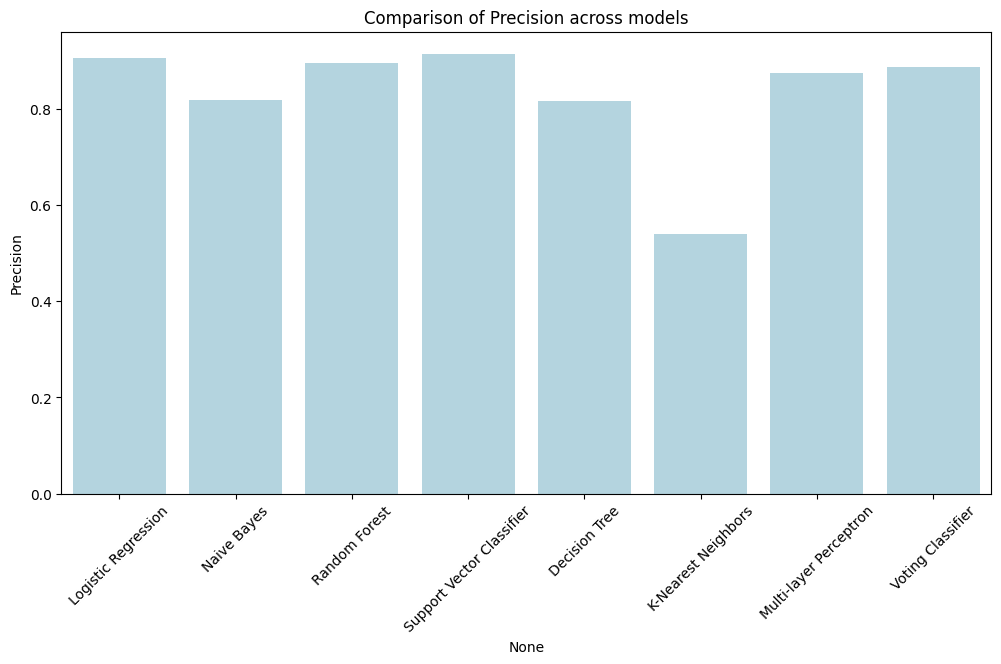

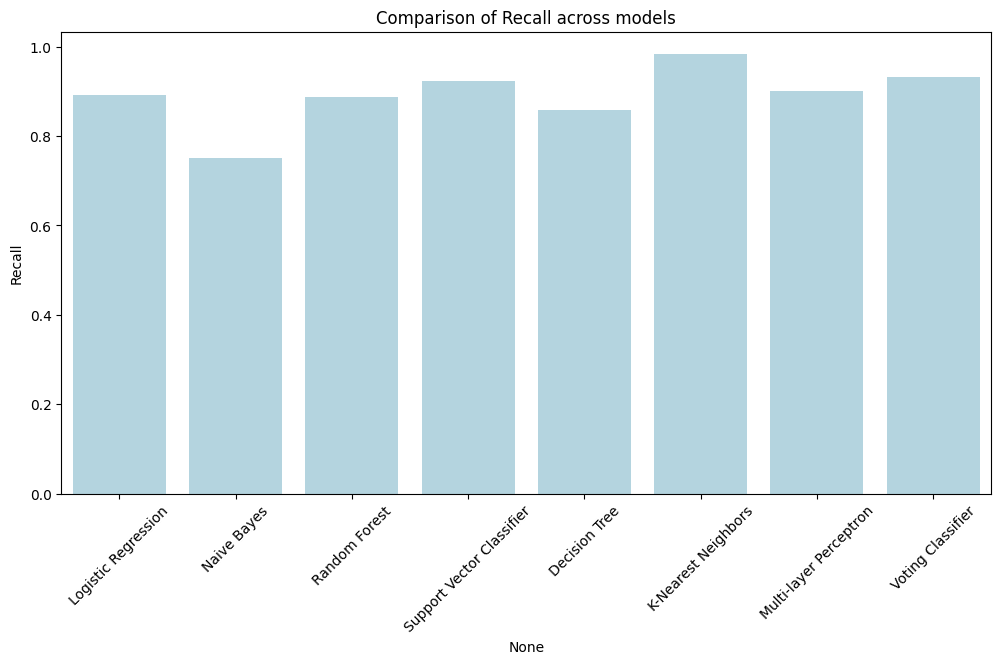

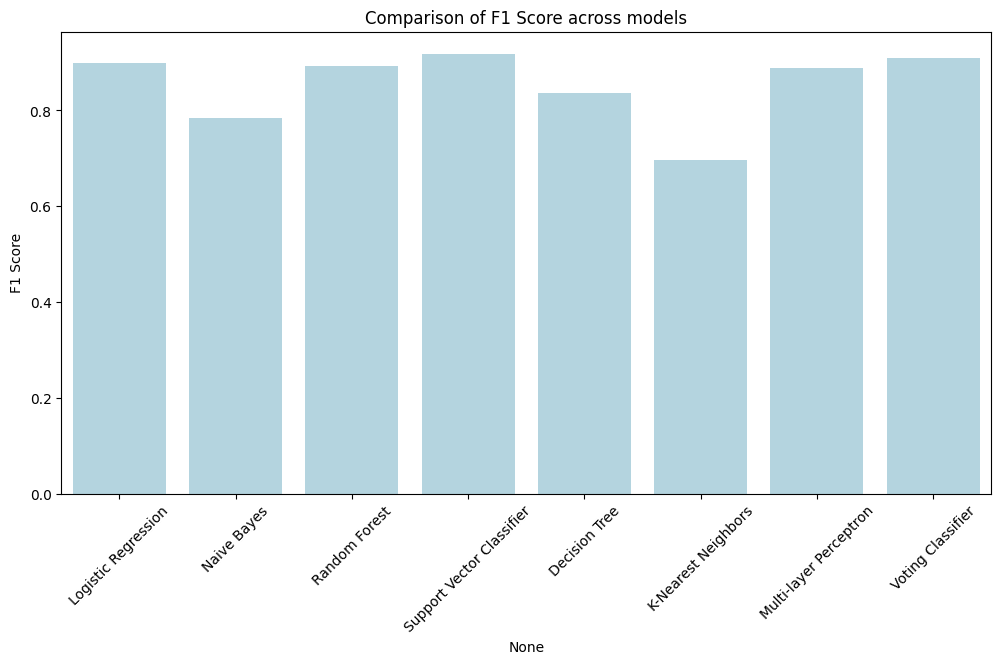

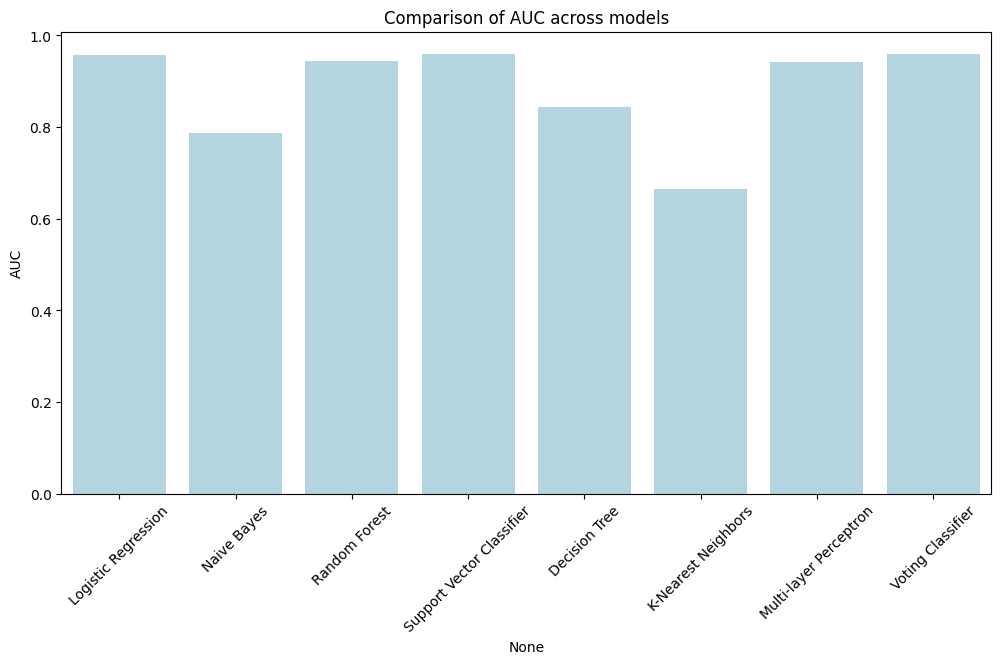

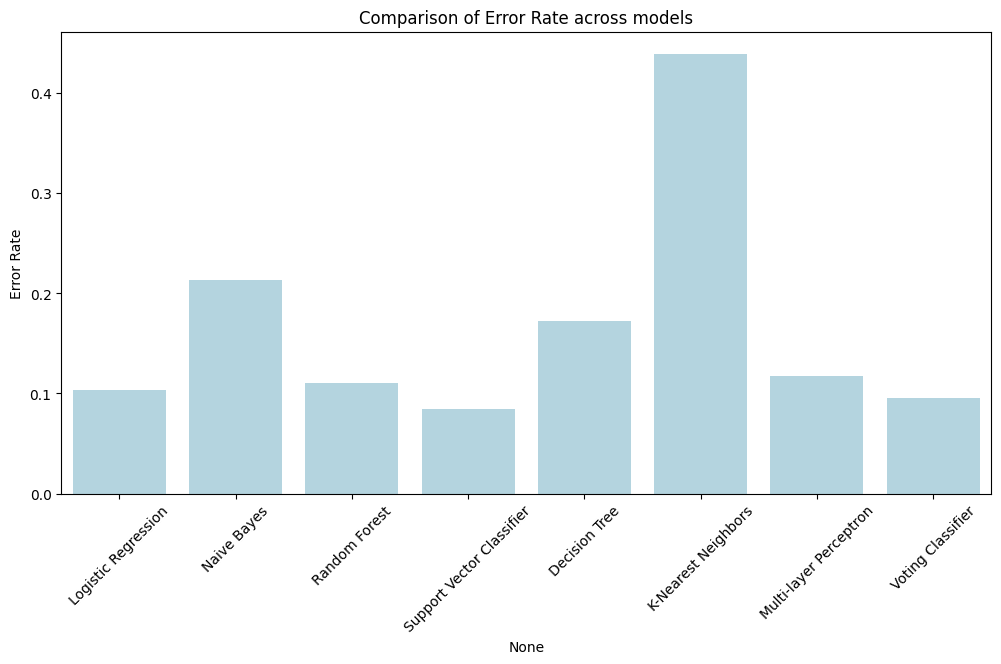

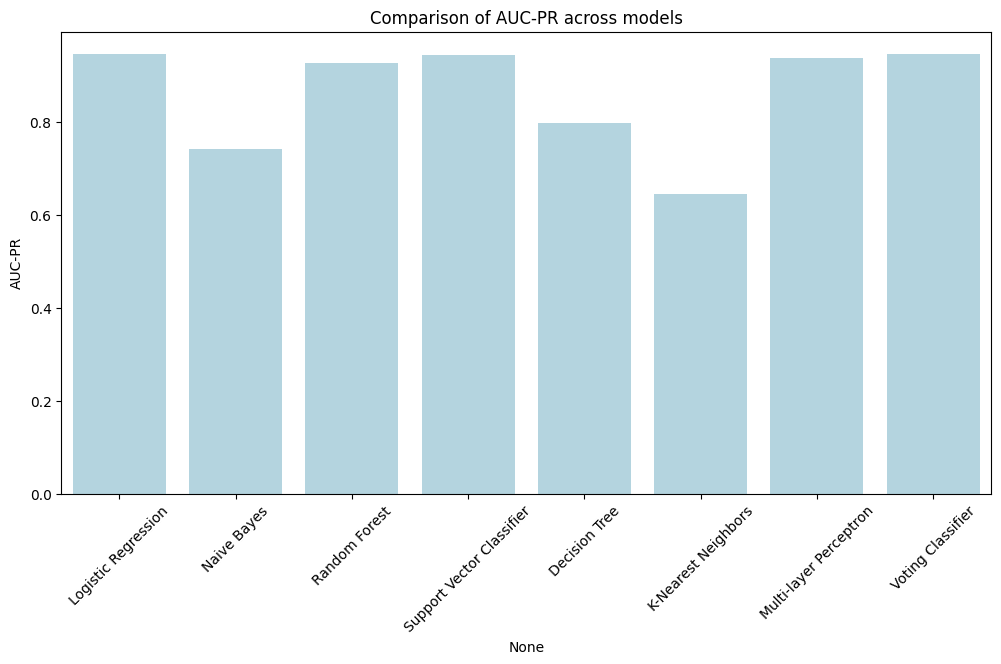

In [1]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Print results for the Voting Classifier
print(f"Model: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

# Add Voting Classifier results to results dictionary
results["Voting Classifier"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "AUC": auc,
    "Error Rate": error_rate,
    "AUC-PR": auc_pr
}

# Convert results dictionary to DataFrame for easier plotting
results_df = pd.DataFrame(results).T

# Bar plot for all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Error Rate', 'AUC-PR']

# Plotting
for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    # Create bar plot for each metric
    sns.barplot(x=results_df.index, y=results_df[metric], color='lightblue') 
    
    # Add titles and rotate x-axis labels for readability
    plt.title(f'Comparison of {metric} across models')
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


Detected encoding: Windows-1252
Model: Logistic Regression
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452



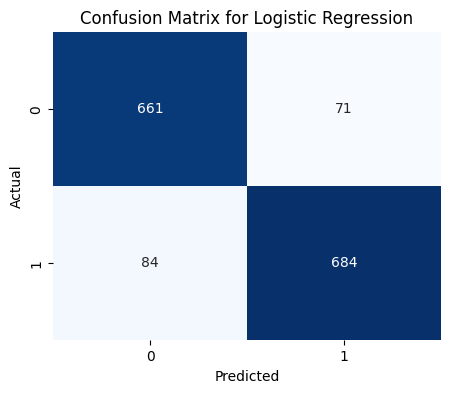

Model: Naive Bayes
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414



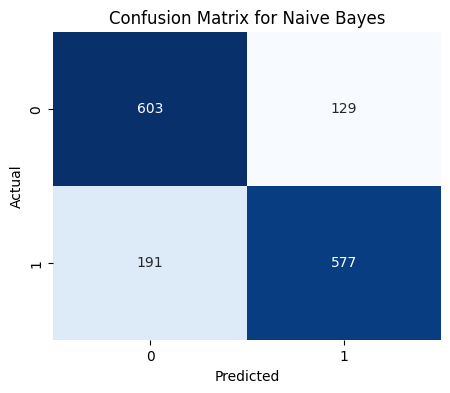

Model: Random Forest
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277



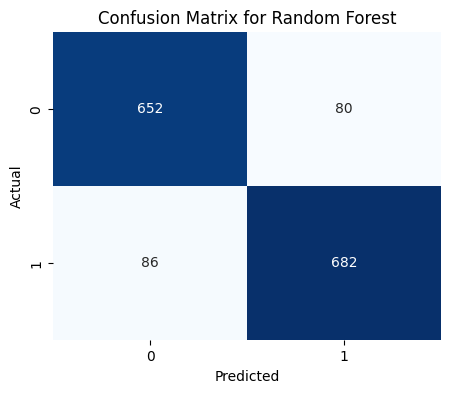

Model: Support Vector Classifier
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9603, Error Rate: 0.0840, AUC-PR: 0.9432



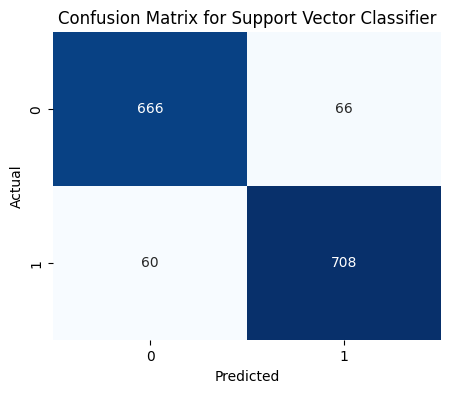

Model: Decision Tree
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969



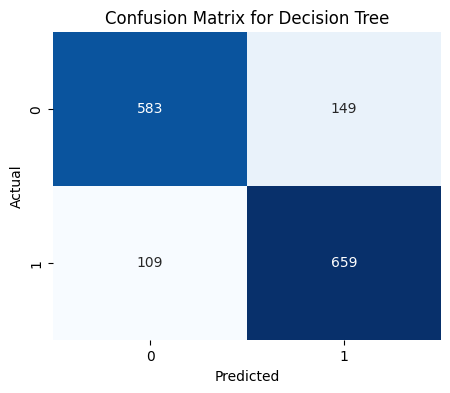

Model: K-Nearest Neighbors
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452



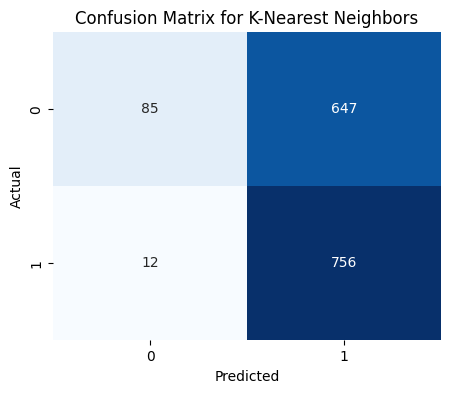

Model: Multi-layer Perceptron
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872, AUC: 0.9424, Error Rate: 0.1173, AUC-PR: 0.9375



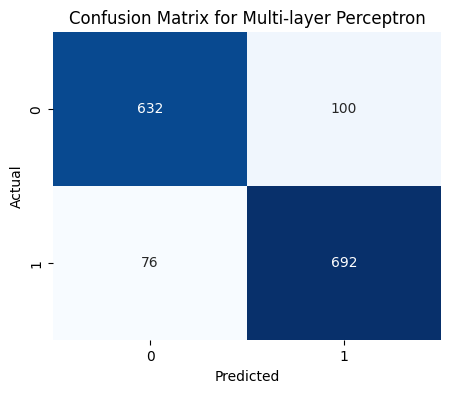

Model: Voting Classifier
Accuracy: 0.9047, Precision: 0.8872, Recall: 0.9323, F1 Score: 0.9092, AUC: 0.9604, Error Rate: 0.0953, AUC-PR: 0.9470



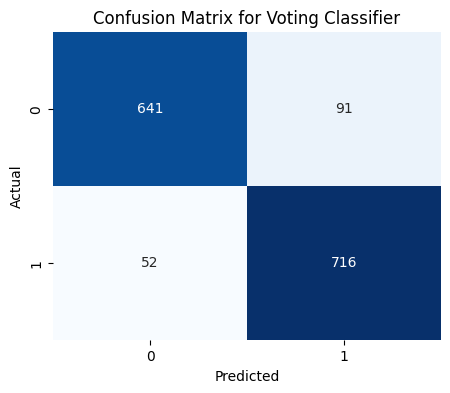

In [2]:
import chardet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_train_pred = model.predict(v_train.toarray())
    y_test_pred = model.predict(v_test.toarray())

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, model.predict_proba(v_test.toarray())[:, 1])
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, model.predict_proba(v_test.toarray())[:, 1])

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cm, model_name)

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_pred = voting_clf.predict(v_test.toarray())

# Calculate metrics for Voting Classifier
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])
error_rate = 1 - accuracy
auc_pr = average_precision_score(y_test, voting_clf.predict_proba(v_test.toarray())[:, 1])

# Print results for the Voting Classifier
print(f"Model: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

# Confusion matrix for Voting Classifier
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, "Voting Classifier")


Detected encoding: Windows-1252
Model: Logistic Regression
Accuracy: 0.8967, Precision: 0.9060, Recall: 0.8906, F1 Score: 0.8982, AUC: 0.9571, Error Rate: 0.1033, AUC-PR: 0.9452

Model: Naive Bayes
Accuracy: 0.7867, Precision: 0.8173, Recall: 0.7513, F1 Score: 0.7829, AUC: 0.7875, Error Rate: 0.2133, AUC-PR: 0.7414

Model: Random Forest
Accuracy: 0.8893, Precision: 0.8950, Recall: 0.8880, F1 Score: 0.8915, AUC: 0.9433, Error Rate: 0.1107, AUC-PR: 0.9277

Model: Support Vector Classifier
Accuracy: 0.9160, Precision: 0.9147, Recall: 0.9219, F1 Score: 0.9183, AUC: 0.9602, Error Rate: 0.0840, AUC-PR: 0.9432

Model: Decision Tree
Accuracy: 0.8280, Precision: 0.8156, Recall: 0.8581, F1 Score: 0.8363, AUC: 0.8437, Error Rate: 0.1720, AUC-PR: 0.7969

Model: K-Nearest Neighbors
Accuracy: 0.5607, Precision: 0.5388, Recall: 0.9844, F1 Score: 0.6965, AUC: 0.6651, Error Rate: 0.4393, AUC-PR: 0.6452

Model: Multi-layer Perceptron
Accuracy: 0.8827, Precision: 0.8737, Recall: 0.9010, F1 Score: 0.8872,

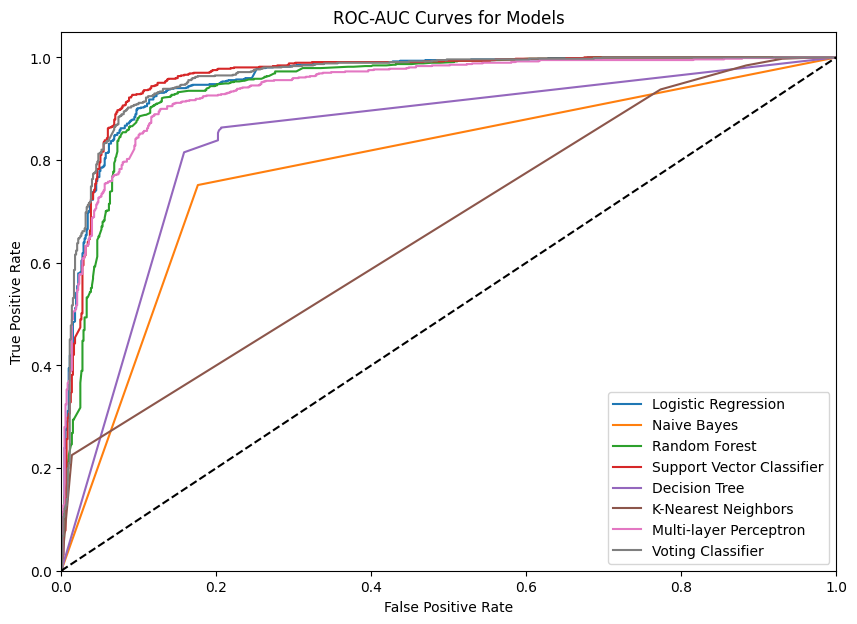

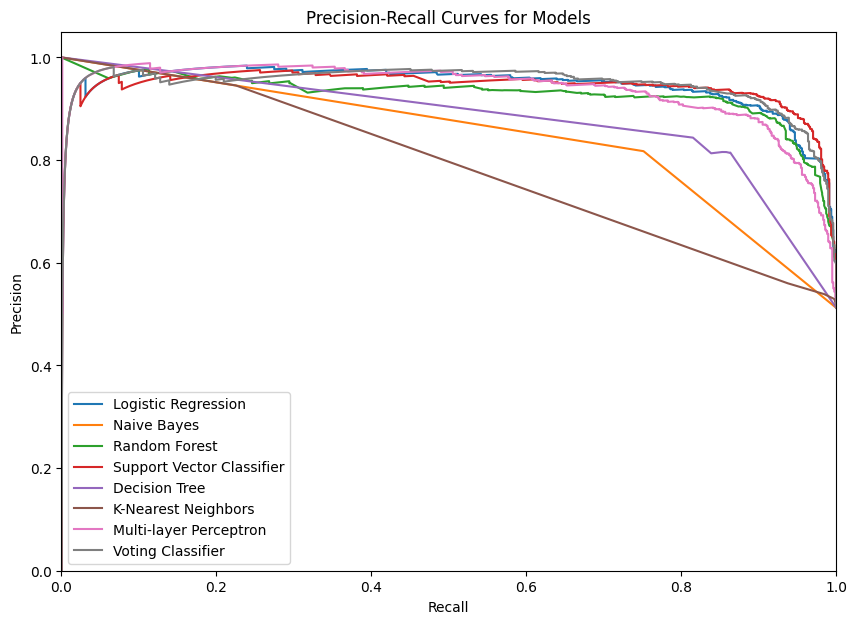

In [3]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, roc_curve, precision_recall_curve
)

# Step 1: Detect the encoding of the file
with open('5000 YT comments.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f'Detected encoding: {encoding}')

# Step 2: Load the dataset with the detected encoding
data = pd.read_csv('5000 YT comments.csv', encoding=encoding)

# Data preprocessing
comments = data['Comment']
spam = data['Spam']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(comments, spam, test_size=0.3, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
v_train = vectorizer.fit_transform(X_train)
v_test = vectorizer.transform(X_test)

# Initialize models with random_state where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multi-layer Perceptron": MLPClassifier(random_state=42, max_iter=1000),
}

# Dictionary to store the best models and their results
results = {}

# Lists for storing curve data for plotting
roc_curves = {}
pr_curves = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(v_train.toarray(), y_train)

    # Make predictions
    y_test_prob = model.predict_proba(v_test.toarray())[:, 1]

    # ROC-AUC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_curves[model_name] = (fpr, tpr)

    # PR-AUC curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_curves[model_name] = (precision, recall)

    # Calculate metrics
    accuracy = accuracy_score(y_test, model.predict(v_test.toarray()))
    precision_score_ = precision_score(y_test, model.predict(v_test.toarray()))
    recall_score_ = recall_score(y_test, model.predict(v_test.toarray()))
    f1 = f1_score(y_test, model.predict(v_test.toarray()))
    auc = roc_auc_score(y_test, y_test_prob)
    error_rate = 1 - accuracy
    auc_pr = average_precision_score(y_test, y_test_prob)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision_score_,
        "Recall": recall_score_,
        "F1 Score": f1,
        "AUC": auc,
        "Error Rate": error_rate,
        "AUC-PR": auc_pr
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision_score_:.4f}, Recall: {recall_score_:.4f}, "
          f"F1 Score: {f1:.4f}, AUC: {auc:.4f}, Error Rate: {error_rate:.4f}, AUC-PR: {auc_pr:.4f}\n")

# Create a Voting Classifier with defined models and random_state
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('mlp', MLPClassifier(random_state=42, max_iter=1000))
    ],
    voting='soft'
)

# Fit Voting Classifier
voting_clf.fit(v_train.toarray(), y_train)
y_test_prob = voting_clf.predict_proba(v_test.toarray())[:, 1]

# ROC-AUC curve for Voting Classifier
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_curves["Voting Classifier"] = (fpr, tpr)

# PR-AUC curve for Voting Classifier
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_curves["Voting Classifier"] = (precision, recall)

# Plot ROC-AUC curve for all models
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=model_name)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Models')
plt.legend(loc="lower right")
plt.show()

# Plot PR-AUC curve for all models
plt.figure(figsize=(10, 7))
for model_name, (precision, recall) in pr_curves.items():
    plt.plot(recall, precision, label=model_name)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Models')
plt.legend(loc="lower left")
plt.show()
